# Lector de matricules
#### v1
L'objectiu d'aquest notebook es fer un proof of concept de la pipeline.

Aquesta pipeline s'encarregara de fer:
* Obtenir les imatges
* Llegir imatges
* Carregar el model YoLo v5
* Fer inferencia en les imatges
* Desar valors

# 0. Imports

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
# Reqs

# # Script for downloading and installing compatible versions.
# # Download the required packages and versions
# !wget https://download.pytorch.org/whl/cu111/torch-1.8.1%2Bcu111-cp39-cp39-linux_x86_64.whl
# !wget https://download.pytorch.org/whl/cu111/torchvision-0.9.1%2Bcu111-cp39-cp39-linux_x86_64.whl
# # Install the packages    
# !pip install torch-1.8.1+cu111-cp39-cp39-linux_x86_64.whl
# !pip install torchvision-0.9.1+cu111-cp39-cp39-linux_x86_64.whl

# 1. Obtencio d'imatges
Es procedira a descarregar imatges des de repositoris publics amb llicencia permissiva.

In [4]:
# Set base image directory
os.chdir("../")
root = os.getcwd()
base_imdir = os.path.join(root,"pipeline-check")
print("Root directory: {}".format(root))

Root directory: /home/noone/smartcatalonia-2021/lector-matricules


In [4]:
# Lookup all files in the image directory
(_,_,filenames) = next(os.walk(base_imdir))

In [5]:
print(filenames)

['buses.jpg', 'moto.jpg', 'embus-barcelona.jpg', '3342836.jpg']


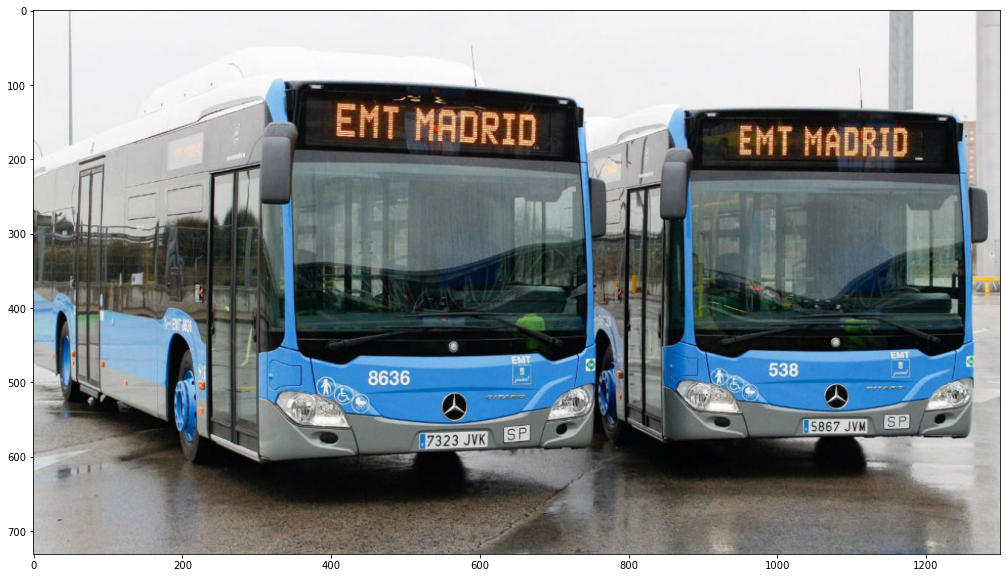

In [6]:
# Show the first image in the list
img_dir = os.path.join(base_imdir,filenames[0])
img = cv2.imread(img_dir)

plt.figure(figsize=[20,10])
plt.imshow(img[:,:,::-1])
plt.show()

In [7]:
print("PyTorch {} and Torchvision {} on ({})".format(torch.__version__,torchvision.__version__,torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'))

if torch.__version__.split('+')[-1] != torchvision.__version__.split('+')[-1]:
    print("Incompatible versions of pytorch and torchvision for YoLo-v5")

PyTorch 1.8.1+cu111 and Torchvision 0.9.1+cu111 on (GeForce RTX 2070)


In [8]:
# Load model from torch hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/noone/.cache/torch/hub/master.zip

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1

Adding autoShape... 


In [9]:
# List images to infer
imgs = []
imgs = [os.path.join(base_imdir,image) for image in filenames]

print("The number of images to run inference into is {}".format(len(imgs)))

The number of images to run inference into is 4


In [10]:
# Do the inference
results = model(imgs, size=640)

In [11]:
# Results
results.print()
results.save()

image 1/4: 731x1300 1 person, 2 buss
image 2/4: 601x1068 1 person, 1 motorcycle
image 3/4: 453x680 2 persons, 23 cars, 2 motorcycles, 1 truck
image 4/4: 480x640 5 persons, 1 motorcycle, 1 truck
Speed: 10.7ms pre-process, 58.7ms inference, 1.0ms NMS per image at shape (4, 3, 480, 640)
Saved buses.jpg, moto.jpg, embus-barcelona.jpg, 3342836.jpg to runs/hub/exp


In [12]:
# Directory where experiments of inferenced images are saved
inf_dir = os.path.join(root,"runs/hub")

# Search for the latest experiment directory
# List all the experiment dirs
(_, exp_dirs, _) = next(os.walk(inf_dir))

# Impute a 0 for the first experiment, which does not come with a number
exp_dirs[0] = "exp0"

# Run through all the experiment directories and extract the order
all_exp=[int(exp_dir.split("exp")[-1]) for exp_dir in exp_dirs if len(exp_dirs) > 1]

# Select the last experiment dir
last_exp = max(all_exp)
last_exp_dir = os.path.join(inf_dir,"exp"+str(last_exp))

# Lookup all files in the experiment directory
(_, _, inf_files) = next(os.walk(last_exp_dir))

# List the images with its full path
inf_imgs = []
inf_imgs = [os.path.join(last_exp_dir,image) for image in inf_files]

ValueError: max() arg is an empty sequence

In [ ]:
# Show all the images
for i,image in enumerate(inf_imgs):
    print(image)
    fig = plt.figure(figsize=(12,12))
    img = cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

In [ ]:
os.chdir(root)
!git clone https://github.com/ultralytics/yolov5  # clone repo
!git pull https://github.com/ultralytics/yolov5 # update repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [ ]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.5 --source /home/noone/smartcatalonia-2021/lector-matricules/pipeline-check

In [ ]:
Image(filename='runs/detect/exp9/embus-barcelona.jpg', width=600)

In [ ]:
# Install kaggle package for dataset downloading
!pip install kaggle --upgrade --quiet

In [ ]:
os.chdir(root)

if not os.path.isdir("datasets"):
    os.mkdir("datasets")

os.chdir("datasets")

# Download kaggle dataset for license plate detection
if not os.path.isdir("car-plate-detection"):
    os.mkdir("car-plate-detection")
    os.chdir("car-plate-detection")
    !kaggle datasets download -d andrewmvd/car-plate-detection
    # Extract the files
    !unzip -q car-plate-detection.zip
    !rm car-plate-detection.zip

In [ ]:
# Read xml file into a dictionary

# Set the working paths
data_path = os.path.join(root,"datasets","car-plate-detection")
img_path = os.path.join(data_path,"images")
ann_path = os.path.join(data_path,"annotations")

# Do a swipe and get all the xml files with annotations
(_,_,xmlfiles) = next(os.walk(ann_path))

os.chdir(ann_path)
ann_dict = {"filename": [],
            "filepath": [],
            "xmin": [],
            "xmax": [],
            "ymin": [],
            "ymax": [],
            "height": [],
            "width":[],
            "x": [],
            "y": []
           }

# Enter each xml file discovered, get some data and store it in the dictionary
for xmlfile in xmlfiles:
    with open(xmlfile) as file:
        data = file.read()
        
        # String extraction of the important data
        filename = data.split("<filename>")[-1].split("</filename>")[0].split(".png")[0]
        filepath = os.path.join(img_path,filename)+".png"
        xmin = int( data.split("<xmin>")[-1].split("</xmin>")[0] )
        xmax = int( data.split("<xmax>")[-1].split("</xmax>")[0] )
        ymin = int( data.split("<ymin>")[-1].split("</ymin>")[0] )
        ymax = int( data.split("<ymax>")[-1].split("</ymax>")[0] ) 
        im_width = int( data.split("<width>")[-1].split("</width>")[0] )
        im_height = int( data.split("<height>")[-1].split("</height>")[0] )
        
        
        # Normalized center of the bounding box in both axis
        x = ((xmax-xmin)/2 + xmin) / im_width
        y = ((ymax-ymin)/2 + ymin) / im_height
        
        # Normalized height and width
        width = (xmax-xmin) / im_width
        height = (ymax-ymin) / im_height
        
        # Writing into dictionary
        ann_dict["filename"].append(filename)
        ann_dict["filepath"].append(filepath)
        ann_dict["xmin"].append(xmin)
        ann_dict["xmax"].append(xmax)
        ann_dict["ymin"].append(ymin)
        ann_dict["ymax"].append(ymax)
        ann_dict["x"].append(x)
        ann_dict["y"].append(y)
        ann_dict["width"].append(width)
        ann_dict["height"].append(height)
        
        

In [ ]:
# Convert dictionary to DF and export as CSV
os.chdir(data_path)
ann_df = pd.DataFrame.from_dict(ann_dict)
ann_df.to_csv("annotations.csv",index=False)

In [ ]:
label_df = pd.read_csv("annotations.csv",usecols=["filename","x","y","width","height"])

# Add the label column, not really useful in this 1 class detection.
label_df["label"] = "license plate"

# Encoding the classes as target numbers
label_df["class"] = label_df["label"]                       # Copy the class column into a new one called target
label_df["class"] = label_df["class"].astype("category")   # Change target column data type to categorical data
labels_mapping = dict( enumerate(label_df['class'].cat.categories)) # Make a dictionary of the assigned labels to each target
label_df["class"] = label_df["class"].cat.codes            # Assign a number to each category (one for each unique class)
label_df["class"] = label_df["class"].astype("object")     # Change target column data type to object (original type)

# Reorder columns
label_df = label_df[["filename","label","class","x","y","width","height"]]

label_df

In [ ]:
# Label creation
label_path = os.path.join(data_path,"labels")

if not os.path.isdir(label_path):
    os.mkdir(label_path)
    
os.chdir(label_path)

# We now have to create the label files in a yolo format, which is
# a txt file named as the image, containing these columns
# label x_center_normalized y_center_normalized width_normalized height_normalized


for i in range(len(label_df)):
    
    # Get the filename without the image extension and add the txt extension
    txt_file_name = str(label_df["filename"][i])+".txt"
    
    with open(txt_file_name,"w") as txtfile:
        txtfile.write(str(label_df["class"][i])+" "+str(label_df["x"][i])+" "+str(label_df["y"][i])+" "+str(label_df["width"][i])+" "+str(label_df["height"][i]))
        

In [ ]:
# Split the data into train/val

os.chdir(data_path)

msk = np.random.rand(len(label_df)) < 0.8
train = label_df[msk].reset_index(drop = True)
train.to_csv(os.path.join(data_path, 'train_df.csv'),index = False)

val = label_df[~msk].reset_index(drop = True)
val.to_csv(os.path.join(data_path, 'val_df.csv'),index = False)


# Define and create folders for image training data
train_img_path = os.path.join(img_path,"train")
val_img_path = os.path.join(img_path,"val")

if not os.path.isdir(train_img_path):
    os.mkdir(train_img_path)
    
    # Move files from image folder to each training or validation folder
    for i in range(len(train)):
        filename = train["filename"][i]+".png"
        filepath0 = os.path.join(img_path,filename)
        filepath1 = os.path.join(train_img_path,filename)
        os.replace(filepath0,filepath1)
    
if not os.path.isdir(val_img_path):
    os.mkdir(val_img_path)
    
    # Move files from image folder to each training or validation folder
    for i in range(len(val)):
        filename = val["filename"][i]+".png"
        filepath0 = os.path.join(img_path,filename)
        filepath1 = os.path.join(val_img_path,filename)
        os.replace(filepath0,filepath1)
    
# Define and create folders for label training data
train_label_path = os.path.join(label_path,"train")
val_label_path = os.path.join(label_path,"val")

if not os.path.isdir(train_label_path):
    os.mkdir(train_label_path)
    
    # Move files from image folder to each training or validation folder
    for i in range(len(train)):
        filename = train["filename"][i]+".txt"
        filepath0 = os.path.join(label_path,filename)
        filepath1 = os.path.join(train_label_path,filename)
        os.replace(filepath0,filepath1)
    
if not os.path.isdir(val_label_path):
    os.mkdir(val_label_path)
    
    # Move files from image folder to each training or validation folder
    for i in range(len(val)):
        filename = val["filename"][i]+".txt"
        filepath0 = os.path.join(label_path,filename)
        filepath1 = os.path.join(val_label_path,filename)
        os.replace(filepath0,filepath1)

In [ ]:
yolo_dir = os.path.join(root,"yolov5")
os.chdir(yolo_dir)

# Create dataset configuration YAML file
if not os.path.isfile("dataset.yaml"):
    with open("dataset.yaml","w") as file:
        file.write("train: "+train_img_path+"\n")
        file.write("val: "+val_img_path+"\n")
        file.write("nc: 1\n")
        file.write("names: [""license_plate""]")

In [ ]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs/

!python train.py --img 640 --batch 8 --epochs 500 \
    --data dataset.yaml --cfg models/yolov5s.yaml --name v1_pipeline_check